<a href="https://colab.research.google.com/github/fatmachafra/ColabDesign/blob/main/MachineLearning_MolBio_2025%20/Tutorial/Tutorial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning - Practical 1 - Linear Regression**



## **Imports**

## Jupyter Notebook provides the possibility of using libraries, functions and variables globally. This means, once you import the libraries, functions, etc. you won't have to import them again in the next cell. However, if for any reason you end the session (crash, timeout, etc.), then you'll have to run this cell to have your libraries imported again. So, let's go ahead and import whatever we need in this homework assignment.

## Note: If you are not running in colab, you might need to install some libraries and packages. You can install libraries using `!pip install LIBNAME`.

In [ ]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import spearmanr

## The  dataset

## The dataset consists of over 20.000 materials and lists their physical features. From these features, we want to learn how to predict the critical temperature, i.e. the temperature we need to cool the material to so it becomes superconductive. First load and familiarize yourself with the data set a bit.

## Please upload the superconduct_train.csv file into this Colab session. Drag and drop the file onto the files tab on the left.

In [ ]:
data = pd.read_csv('/content/superconduct_train.csv')
print(data.shape)

In [ ]:
data.head()

## Because the dataset is rather large, we prepare a small subset of the data as training set, and another subset as test set. To make the computations reproducible, we set the random seed. This makes the train and test splits same even if you re-run the notebook. Keeping the splits same is important for the fair models comparison.

In [ ]:
target_clm = 'critical_temp'  # the critical temperature is our target variable
n_trainset = 200  # size of the training set
n_testset = 50  # size of the test set
feature_clms = [i for i in data.columns if i != target_clm]# creating a list of feature columns, which includes all columns in your dataset except the one that is the target column (target_clm) you want to predict.

## In machine learning models, we usually start with splitting our data into train and test (and validation) sets. The fraction of train data is usually 75% - 80% and test (and validation) is the remaining.

## Train data is used only for training and test data is used to evaluate your model on unseen data. It is a key step in machine learning.

In [ ]:
from sklearn.model_selection import train_test_split
# set random seed to make sure every test set is the same
random_state = 42 # this helps to make your code reproducible. You can use any intereger
data = data.iloc[:250, :] # create a subset of the large dataset
Y = data[target_clm].to_numpy() # target variable to predict from other variables
X = data[feature_clms].to_numpy() # features to train the model with

# Split the data into train and test sets.
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X, Y,
                                                    train_size=n_trainset,
                                                    test_size = n_testset,
                                                    random_state=random_state, # keeps the process reproducible
                                                    shuffle=True # shuffle the order of samples
                                                    )
print('Full training set shapes (X and y):', X_train_full.shape, y_train_full.shape)
print('Full test set shapes (X and y):', X_test_full.shape, y_test_full.shape)

# **Data Visualization and Normalization**
## Exploring your data is the first important task to do. It can give you insights about your features and their distributions. You can also find outliers, and less informative features early on in your analysis by visualizing your data and checking the statistics.

## Data normalization is required to keep information clean, and keep the range of the features consistent. Otherwise, undesired behaviours can happen, e.g features with larger magnitudes dominate the model's predictions, while other features with lower magnitudes might be more informative.

## **Task 1: Plot the dataset**

## To explore the dataset, use `X_train_full` and `y_train_full` for two descriptive plots:

##* **Histogram** of the target variable. Use `plt.hist`.

##* **Scatter plots** relating the target variable to one of the feature values. For this, look into your raw data mean and variances for each feature in `X_train_full`, sort and select the 5 features with the highest variances. Use `plt.scatter` to visualize these features in X axis and `y_train_full` in Y-axis. (Hint: import numpy is np and use `np.var` to view the variance)

## * **Box plots** to check the distribution of all of your features in your dataset. Use `plt.boxlpot` to visualize your `X_train_full` as boxes. Try to visualize the outliers.



In [ ]:
# Histogram of the target variable


In [ ]:
# Scatter plots of the target variable vs. features

In [ ]:
# Box plots of the feature variables

## **Normalization**
## To normalize your data, you need to select the normalization method. Look into your box plots and try to answer the following questions for yourself:

##* Are your features normally distributed?

##* Are there outliers in your data?

##* Is your data distribution heavily skewed?
<br>

## Transformations based on your data

##*The most commonly used normalization method is Z-score Normalization :

##* Z-score Normalization (Standardization): Transforms data to have mean 0 and standard deviation 1. It works well for different distributions of data  or when you want to reduce outlier impact. It doesn’t bound data to a fixed range but handles varying scales well and is effective for many ML models.

####* Note: Logarithmic transformation is another type of normalization technique. It is used when relative fold changes are significant, such as distinguishing between 0.1 and 0.01. Log transform compresses wide-ranging data into a smaller scale, making multiplicative differences additive. It is especially valuable when data is heavily peaked at zero and strictly positive. After log transformation, z-score normalization can be done to standardize the data, but keep in mind that z-score normalization can also be applied alone. See the image below showing a lognormal distribution vs a normal distribution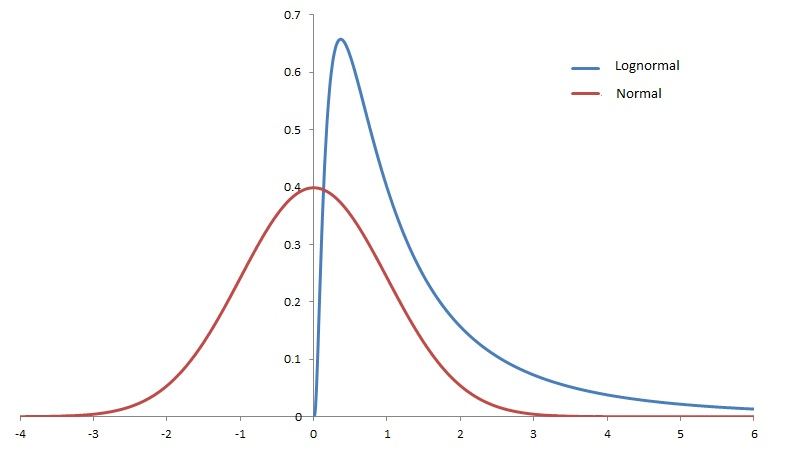

## **Task 2: Choose the suitable normalization technique for your data**



##* Histogram for all features: plot a histogram for all of your features in a 9*9 grid. You can use AI. Are there outliers in your features?

##* Which features you think would need log transformation?

##* Log10 transform your 81 features and plot histograms of your normalized features in a 9*9 grid. Look specifically into features 21 and 34. How did they change before and after normalization?

##* Standardize your log transformed data `(x-mean)/var`. Look into impact of the standardization of 81 features in one box plot. Compare them with those before normalization.

##* Calculate the spearmann correlation coefficient between all of your 81 features and target variable. Use `spearmanr` in a `for` loop over all 81 features vs target variable. Plot the correlation coefficients as a single bar plot

In [ ]:
# Histogram before normalization

In [ ]:
# Log norm and histogram after normalization

In [ ]:
# Standardizing the data and box plot

In [ ]:
# Spearmann correlation and bar plot- using normalised data (log transform and then standardization)


## Which material properties may be useful for predicting target value? What other observations can you make?

### Answer: Feature 62 and 68 have the highest positive correlation with the target variable. Feature 78 has the highest negative correlation with the target variable.

# **Ordinary Least Squares Linear Regression**

## Linear regression is a statistical method that identifies the best-fitting linear relationship between variables by minimizing the sum of the squares of the differences (residuals) between observed and predicted values. We want to use linear regression to predict the y variable. The ordinary least squares estimator formula is:

$y_i = w_0 + w_1*x_1 + w_2 * x_2 + ... + w_n * x_n + \varepsilon_i$

## Where $w_0$ is y-intercept. The goal is to find $w$ such that it minimizes $\sum{\varepsilon^2_i}$.

##Task 3: Use sklearn to fit a logistic regression model

### Now, familiarize yourself with the sklearn library.

### You will find `sklearn.linear_model.LogisticRegression`, the sklearn implementation of logistic regression.

### Use this sklearn class to implement logistic regression. Obtain estimates of the weights on `X_train_full` and `y_train_full` and compute performance metrics such as accuracy and F1-score on `X_test_full` and `y_test_full`.

### Before getting to the regression, it is important that you first normalize `X_train_full`and the `X_test_full data.
### Hint: first log transform it and then apply Z-score normalization as you did when doing the normalization for the box plots ealier.



In [ ]:
# NORMALIZE AND STANDARDIZE YOUR DATA
# Log-transform
X_log10_train =
X_log10_test =
# Compute mean and std from training set only
means =
stds =
mean_test =
std_test =
# Standardize both train and test using training parameters
X_standardized_train =
X_standardized_test =
y_standardized_test =
y_standardized_train =

In [ ]:
# Log-transform

# Compute mean and std from training set only


# Standardize both train and test using training parameters


In [ ]:
def sklearn_regression(X_test, X_train, y_train):
    '''Computes OLS weights for linear regression without regularization using the sklearn library on the training set and
       returns weights and testset predictions.

       Inputs:
         X_test: (n_observations, 81), numpy array with predictor values of the test set
         X_train: (n_observations, 81), numpy array with predictor values of the training set
         y_train: (n_observations,) numpy array with true target values for the training set

       Outputs:
         weights: The weight vector for the regression model including the intercept
         y_pred_test: The predictions on the TEST set!
         y_pred_train: The predictions on the TEST set!

       Note:
         The sklearn library automatically takes care of adding a column for the intercept.
    '''

    # ---------------- INSERT CODE ----------------------



    # ---------------- END CODE -------------------------

    return weights, y_pred_test,y_pred_train

### To make life a bit easier, we have already implemented a function to visualize your linear regression outputs below.

In [ ]:
def plot_regression_results(y_test, y_pred, weights):
    '''Produces three plots to analyze the results of linear regression:
        -True vs predicted
        -Raw residual histogram
        -Weight histogram

    Inputs:
        y_test: (n_observations,) numpy array with true values
        y_pred: (n_observations,) numpy array with predicted values
        weights: (n_weights) numpy array with regression weights'''

    print('MSE: ', mean_squared_error(y_test, y_pred))
    print('r^2: ', r2_score(y_test, y_pred))

    fig, ax = plt.subplots(1, 3, figsize=(9, 3))
    # predicted vs true
    ax[0].scatter(y_test, y_pred, s=2)
    ax[0].set_title('True vs. Predicted')
    ax[0].set_xlabel('True %s' % (target_clm))
    ax[0].set_ylabel('Predicted %s' % (target_clm))

    # residuals
    error = np.squeeze(np.array(y_test)) - np.squeeze(np.array(y_pred))
    ax[1].hist(np.array(error), bins=30)
    ax[1].set_title('Raw residuals')
    ax[1].set_xlabel('(true-predicted)')

    # weight histogram
    ax[2].hist(weights, bins=30)
    ax[2].set_title('weight histogram')

    plt.tight_layout()
    plt.show()
    plt.close()

In [ ]:
weights, y_pred_test, y_pred_train = sklearn_regression(X_standardized_test, X_standardized_train, y_standardized_train)
print('----------- ON TEST SET ----------------\n')
plot_regression_results(y_standardized_test, y_pred_test, weights)
print('\n----------- ON TRAIN SET ----------------\n')
plot_regression_results(y_standardized_train, y_pred_train, weights)

### Look at your weight histogram and comment on the range of weights. What could this mean?
If you implemented everything correctly, the MSE is 2.

# **Ridge regression**

## Also known as L2 regularization—is one of several types of regularization for linear regression models. Regularization is a statistical method to reduce errors caused by overfitting on training data. This is useful when developing machine learning models that have a large number of parameters, particularly if those parameters also have high weights.

## The goal is to find $w$ such that minimizes the $\sum{\varepsilon^2_i} + \alpha \sum{w_j^2}$
## This penalizes high $w$ coefficients. We have to choose one parameter $\alpha$ that determines the amount of regularization.

## **Task 4: Use sklearn to complete the function below.**

In [ ]:
def ridge_regression_sklearn(X_test, X_train, y_train, alpha):
    '''Computes OLS weights for regularized linear regression with regularization strength alpha using the sklearn
       library on the training set and returns weights and testset predictions.

       Inputs:
         X_test: (n_observations, 81), numpy array with predictor values of the test set
         X_train: (n_observations, 81), numpy array with predictor values of the training set
         y_train: (n_observations,) numpy array with true target values for the training set
         alpha: scalar, regularization strength

       Outputs:
         weights: The weight vector for the regerssion model including the intercept.
         y_pred_test: The predictions on the TEST set!
         y_pred_train: The predictions on the TRAINING set!


       Note:
         The sklearn library automatically takes care of adding a column for the intercept.
    '''

    # ---------------- INSERT CODE ----------------------



    # ---------------- END CODE -------------------------

    return weights, y_pred_test, y_pred_train

In [ ]:
weights, y_pred_test, y_pred_train = ridge_regression_sklearn(X_standardized_test, X_standardized_train, y_standardized_train, alpha=0.001)
print('----------- ON TEST SET ----------------\n')
plot_regression_results(y_standardized_test, y_pred_test, weights)
print('\n----------- ON TRAINING SET ----------------\n')
plot_regression_results(y_standardized_train, y_pred_train, weights)

### Do you see a difference between your train and test performance before and after ridge regression? Try to explain it.

### What do you observe about the weight histogram when compared to the previous case?

### Why do you think having lower weight values are important?


For further information about regression, refer to these points:

1. Scatter Plot: True vs Predicted

    Overfit Linear Regression: Predicted values do not align along the diagonal—they're widely scattered. This shows poor generalization and that the model is fitting noise from the training set and not underlying structure.

    After Ridge Regression: Points cluster more closely around the diagonal line, indicating more accurate predictions.

    ​

2. Raw Residuals Histogram

    Overfit Linear Regression: The residuals (true minus predicted) are widely spread, often with extreme outliers. This indicates the model is making large errors on test samples and cannot generalize due to having fit noise in the training data.

    ​

    After Ridge Regression: Residuals are more tightly centered near zero, the histogram is narrower and less extreme. Regularization reduces model variance and mean squared error magnitude.

3. Weight Histogram

    Overfit Linear Regression: The histogram shows some regression weights (coefficients) with very large or extreme values. This is a classic overfitting symptom—the model has assigned huge importance to some features in its effort to fit every sample in the training set perfectly.

    ​

    After Ridge Regression: The weights shrink and are more concentrated around zero. Ridge regression penalizes large values, so this histogram becomes more compact, indicating less complex (and less overfit) model behavior.

4. MSE (Mean Squared Error) and $R^2$

    Overfit Linear Regression: MSE for test set is high (model makes large mistakes on the test set) and low for training set, and $R^2$ is often negative or much lower than on the training set (sometimes even worse than just predicting the mean).

## **Task 5: Cross-validation**

## Until now, we always estimated the error on the test set directly. However, we typically do not want to tune hyperparameters of our inference algorithms like $\alpha$ on the test set, as this may lead to overfitting. Therefore, we tune them on the training set using cross-validation. As discussed in the lecture, the training data is here split in `n_folds`-ways, where each of the folds serves as a held-out dataset in turn and the model is always trained on the remaining data. Implement a function that performs cross-validation for the ridge regression parameter $\alpha$.

In [ ]:
def ridgeCV(X, y, n_folds, alphas):
    '''Runs a n_fold-crossvalidation over the ridge regression parameter alpha.
       The function should train the linear regression model for each fold on all values of alpha.

      Inputs:
        X: (n_obs, n_features) numpy array - predictor
        y: (n_obs,) numpy array - target
        n_folds: integer - number of CV folds
        alphas: (n_parameters,) - regularization strength parameters to CV over

      Outputs:
        cv_results_mse: (n_folds, len(alphas)) numpy array, MSE for each cross-validation fold

      Note:
        Fix the seed for reproducibility.
    '''

    cv_results_mse = np.zeros((n_folds, len(alphas)))
    np.random.seed(seed=2)

    # ---------------- INSERT CODE ----------------------



    # ---------------- END CODE -------------------------

    return cv_results_mse

## Now we run 10-fold cross-validation using the training data of a range of $\alpha$s.

In [ ]:
alphas = np.logspace(-7, 7, 100)
mse_cv = ridgeCV(X_standardized_train, y_standardized_train, n_folds=10, alphas=alphas)

## We plot the MSE trace for each fold separately:

In [ ]:
plt.plot(alphas, mse_cv.T, '.-')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Mean squared error')
plt.tight_layout()

## To get a more interpretable answer, we also plot the average across folds:

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(alphas, np.mean(mse_cv, axis=0), '.-')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Mean squared error')
plt.tight_layout()

## What is the optimal $\alpha$? Is it similar to the one found on the test set? Do the cross-validation MSE and the test-set MSE match well or differ strongly?

YOUR ANSWER HERE

In [ ]:
# replace your alpha here and run the next code to see how better you get with this new alpha
new_alpha = # fill

In [ ]:
weights, y_pred_test, y_pred_train = ridge_regression_sklearn(X_standardized_test, X_standardized_train, y_standardized_train, alpha=new_alpha)
print('----------- ON TEST SET ----------------\n')
plot_regression_results(y_standardized_test, y_pred_test, weights)
print('\n----------- ON TRAINING SET ----------------\n')
plot_regression_results(y_standardized_train, y_pred_train, weights)